In [22]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Generate data
N = 100
sample_norm = sp.norm.rvs(size=N)
sample_expon = sp.expon.rvs(size=N)

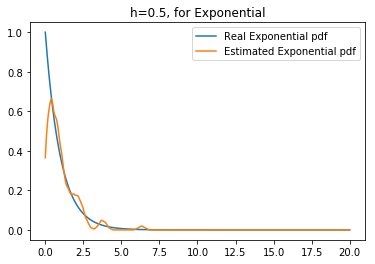

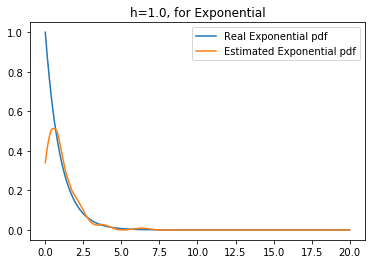

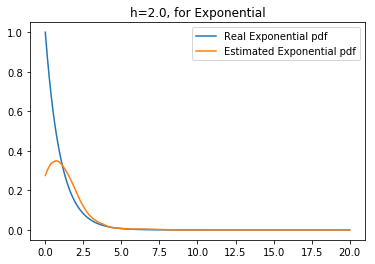

In [87]:
h_set = [0.5, 1, 2]
X_norm = np.linspace(-10, 10, 500) 
est_X_expon = np.linspace(0, 20, 500) 

def KDE(sample_X, bandwidth, est_X):
    X = est_X
    N = len(sample_X)
    h = bandwidth
    Kernel = lambda t: 1 - np.abs(t) if np.abs(t) <= 1 else 0
    est_pdf = lambda x: 1/(N*h) * sum(map(Kernel, (x - sample_X)/h))
    est_Y = list(map(est_pdf, est_X))
    return est_Y


def compare_pdf(est_X, real_pdf, est_pdf, width, dist_name="Norm"):
    plt.figure()
    plt.plot(est_X, real_pdf, label='Real %s pdf'%dist_name)
    plt.plot(est_X, est_pdf, label='Estimated %s pdf'%(dist_name))
    plt.title('h=%.1f, for %s'%(width, dist_name))
    plt.legend()

for width in h_set:
    est_Y_expon = KDE(sample_expon, width, est_X_expon)
    real_pdf = sp.expon.pdf(est_X_expon)
    compare_pdf(est_X_expon, real_pdf, est_Y_expon, width, "Exponential")


